## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

### Loading Model

In [2]:
model  = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

In [4]:
!pip install opencv-python

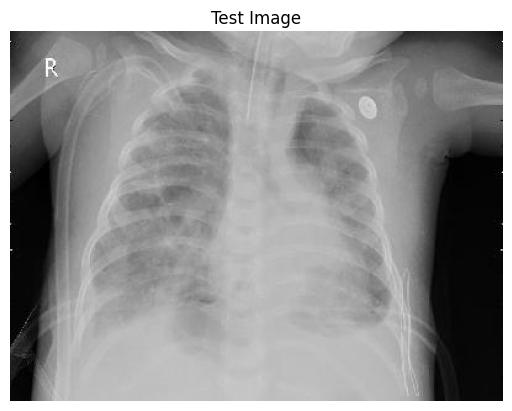

In [8]:
import cv2
import matplotlib.pyplot as plt

image_path = r"test/Bacterial Pneumonia/17.jpeg"
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Image not found or unable to read")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()


## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [10]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 24ms/step


(array([[0.46315747, 0.0390197 , 0.00279494, 0.00501958, 0.4900083 ]],
       dtype=float32),
 (1, 5))

In [11]:
result_index = np.argmax(prediction)
result_index

4

In [12]:
class_name = ['Bacterial Pneumonia',
 'Corona Virus Disease',
 'Normal',
 'Tuberculosis',
 'Viral Pneumonia']

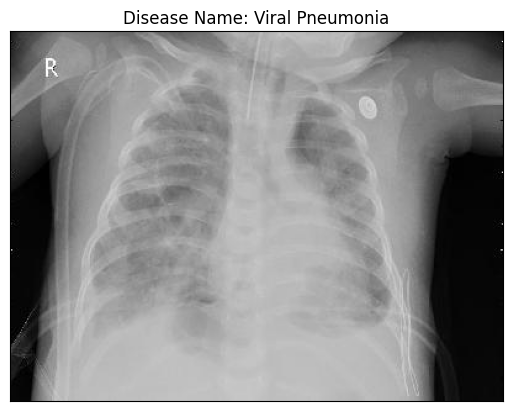

In [13]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
model_prediction


'Viral Pneumonia'